In [21]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import pickle
from numpy import genfromtxt
import pandas as pd
from joblib import Parallel, delayed
import multiprocessing as mp
import scipy.io
from tqdm import tqdm_notebook as tqdm
import h5py
import math

In [22]:
import sys
from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.benchmarks.hypothesis_tests.two_sample_test.power_dimension import power_given_data
from mgcpy.benchmarks.simulations import *
from mgcpy.independence_tests.mgc import MGC
from mgcpy.independence_tests.rv_corr import RVCorr
from mgcpy.independence_tests.hhg import HHG
from mgcpy.independence_tests.kendall_spearman import KendallSpearman

In [23]:
simulations = {'sine_16pi': (sin_sim, 13)}

In [24]:
def power_vs_dimension_parallel(params_dict):
    dims = [1, 3, 4, 5, 7, 9, 10]
    estimated_power = np.zeros(len(dims))
    test = params_dict['independence_test']
    sim = params_dict['simulation_type']
    print(sim, test.get_name())
    
    for i in range(len(dims)):
        estimated_power[i] = power_given_data(test, sim, num_samples=100, num_dimensions=dims[i], translate=0.6)
    
    np.savetxt('{}_{}_dimension_matlab_new.csv'.format(sim, test.get_name()), estimated_power, delimiter=',')
    print('{} {} finished'.format(sim, test.get_name()))
    return (params_dict, estimated_power)

In [25]:
def fill_params_dict_list_dim():
    mcorr = DCorr(which_test='unbiased')
    dcorr = DCorr(which_test='biased')
    mantel = DCorr(which_test='mantel')
    mgc = MGC()
    pearson = RVCorr(which_test='pearson')
    rv_corr = RVCorr(which_test='rv')
    cca = RVCorr(which_test='cca')
    independence_tests = [mcorr, dcorr, mantel, pearson, rv_corr, cca]
    
    params_dict_list = []
    for sim_name, sim_func in simulations.items():
        for test in independence_tests:
            params_dict = {'independence_test': test, 'simulation_type': sim_func[1]}
            params_dict_list.append(params_dict)
    return params_dict_list

In [26]:
%%time
params_dict = fill_params_dict_list_dim()
print(type(params_dict))
pool = mp.Pool(mp.cpu_count()-1)
results = pool.map(power_vs_dimension_parallel, params_dict)

<class 'list'>
13 mantel
13 biased
13 unbiased
13 mantel finished
13 pearson
13 pearson finished
13 rv
13 rv finished
13 cca
13 cca finished
13 biased finished
13 unbiased finished
CPU times: user 107 ms, sys: 58.4 ms, total: 166 ms
Wall time: 1min 14s


In [7]:
def plot_all_curves():
    simulation_names = ['linear', 'exponential', 'cubic','joint_normal', 'step', 'quadratic', 'w_shape', 'spiral', 
                         'bernoulli', 'log', 'fourth_root', 'sine_4pi',
                       'sine_16pi', 'square', 'two_parabolas', 'circle', 'ellipse', 'diamond', 'multi_noise',
                        'multi_indept']
        
        
    fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(14,12)) 
    simulation_type=0
    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            sim_name = simulation_names[simulation_type]
            simulation_type += 1
            tests = ['mgc', 'unbiased', 'biased', 'mantel', 'pearson', 'rv', 'cca']
            #mgc_power = np.genfromtxt('{}_mgc_angle_matlab_new.csv'.format(simulation_type), delimiter=',')

            for test in tests:
                power = np.genfromtxt('{}_{}_dimension_matlab_new.csv'.format(simulation_type, test), delimiter=',')
                x_axis = [1,3,4,5,7,9,10]
                col.plot(x_axis, power, label=test)
                col.set_ylim(-0.25, 1.25)
                col.set_yticks([-0.25, 0, 0.25, 0.50, 0.75, 1.00])
                col.set_title(sim_name) 
    plt.legend()
    plt.subplots_adjust(hspace=.75)
    fig.suptitle('Power of Changing Dimension')
    #plt.savefig('power_curves_dimension_trial')

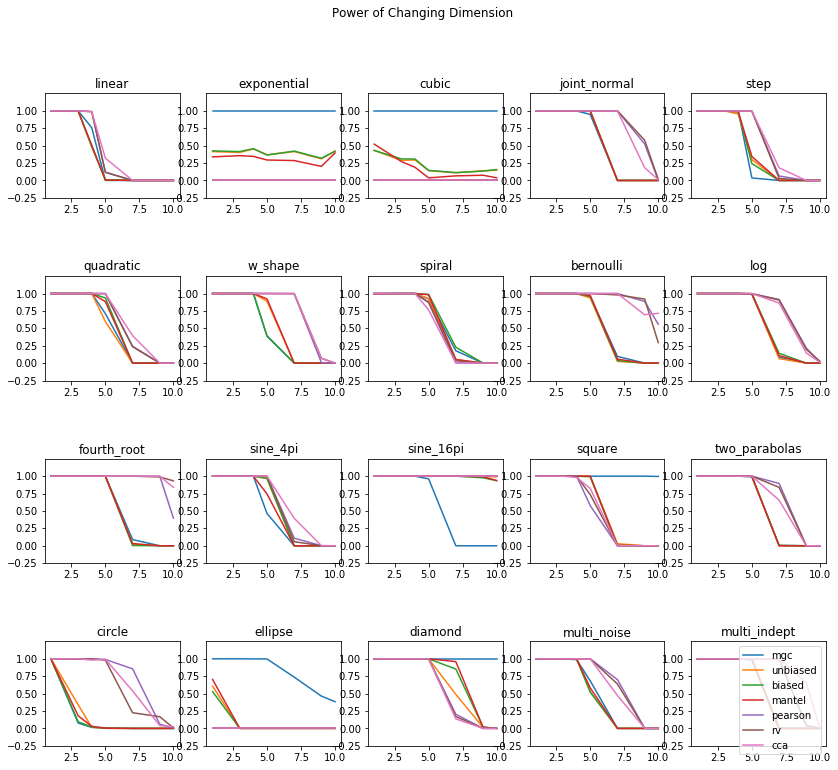

In [8]:
plot_all_curves()

In [9]:
def power_vs_dimension_parallel2(params_dict):
    dims = [1, 3, 4, 5, 7, 9, 10]
    estimated_power = np.zeros(len(dims))
    test = params_dict['independence_test']
    sim = params_dict['simulation_type']
    print(sim, test.get_name())
    
    for i in range(len(dims)):
        estimated_power[i] = power_given_data(test, sim, num_samples=100, num_dimensions=dims[i], translate=0.6)
    
    np.savetxt('{}_{}_dimension_matlab_new.csv'.format(sim, test.get_name()), estimated_power, delimiter=',')
    print('{} {} finished'.format(sim, test.get_name()))
    return (params_dict, estimated_power)

In [10]:
%%time
params_dict = fill_params_dict_list_dim()
print(type(params_dict))
pool = mp.Pool(mp.cpu_count()-1)
results = pool.map(power_vs_dimension_parallel2, params_dict)

<class 'list'>
13 unbiased
13 biased
13 mantel
13 mantel finished
13 pearson
13 pearson finished
13 rv
13 rv finished
13 cca
13 cca finished
13 biased finished
13 unbiased finished
CPU times: user 79.1 ms, sys: 48.7 ms, total: 128 ms
Wall time: 1min 37s


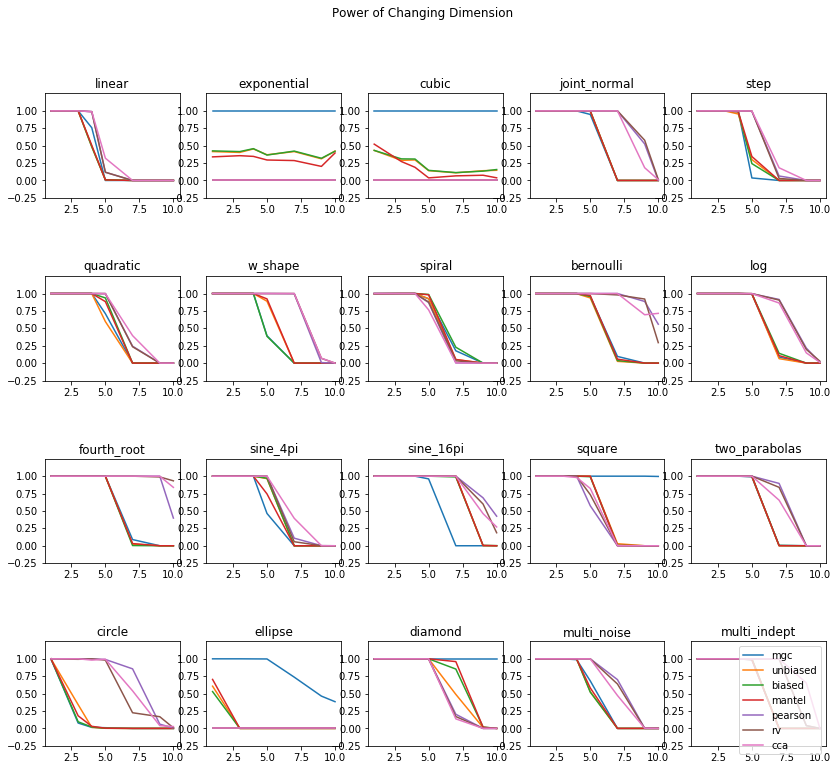

In [11]:
plot_all_curves()

In [12]:
def power_vs_dimension_parallel3(params_dict):
    dims = [1, 3, 4, 5, 7, 9, 10]
    estimated_power = np.zeros(len(dims))
    test = params_dict['independence_test']
    sim = params_dict['simulation_type']
    print(sim, test.get_name())
    
    for i in range(len(dims)):
        estimated_power[i] = power_given_data(test, sim, num_samples=100, num_dimensions=dims[i], translate=0.8)
    
    np.savetxt('{}_{}_dimension_matlab_new.csv'.format(sim, test.get_name()), estimated_power, delimiter=',')
    print('{} {} finished'.format(sim, test.get_name()))
    return (params_dict, estimated_power)

In [13]:
%%time
params_dict = fill_params_dict_list_dim()
print(type(params_dict))
pool = mp.Pool(mp.cpu_count()-1)
results = pool.map(power_vs_dimension_parallel3, params_dict)

<class 'list'>
13 mantel
13 unbiased
13 biased
13 mantel finished
13 pearson
13 pearson finished
13 rv
13 rv finished
13 cca
13 cca finished
13 biased finished
13 unbiased finished
CPU times: user 66.1 ms, sys: 47.1 ms, total: 113 ms
Wall time: 1min 15s


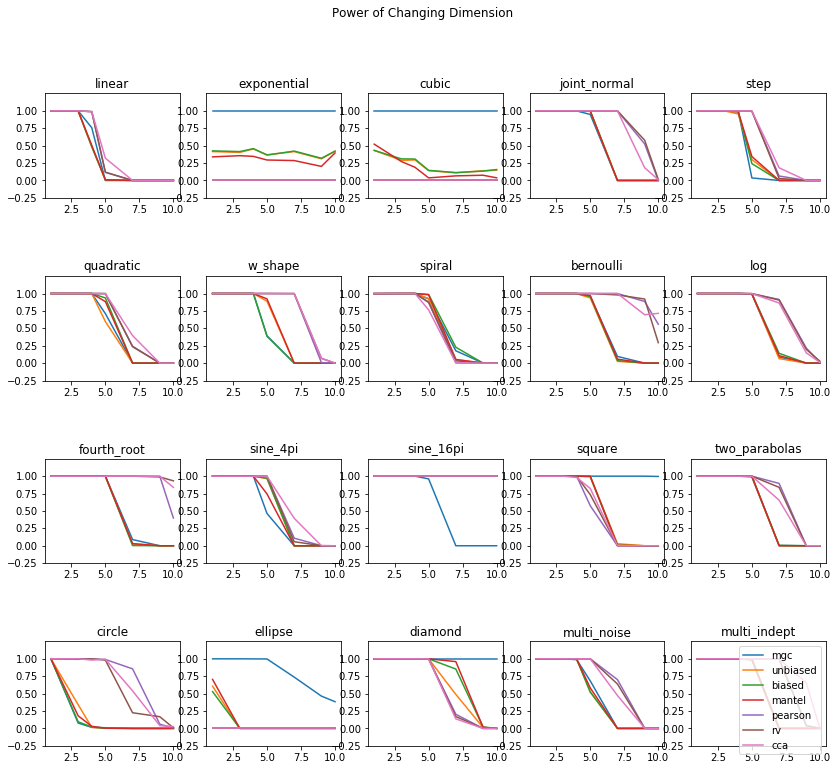

In [14]:
plot_all_curves()

In [15]:
def power_vs_dimension_parallel4(params_dict):
    dims = [1, 3, 4, 5, 7, 9, 10]
    estimated_power = np.zeros(len(dims))
    test = params_dict['independence_test']
    sim = params_dict['simulation_type']
    print(sim, test.get_name())
    
    for i in range(len(dims)):
        estimated_power[i] = power_given_data(test, sim, num_samples=100, num_dimensions=dims[i], translate=0.5)
    
    np.savetxt('{}_{}_dimension_matlab_new.csv'.format(sim, test.get_name()), estimated_power, delimiter=',')
    print('{} {} finished'.format(sim, test.get_name()))
    return (params_dict, estimated_power)

In [16]:
%%time
params_dict = fill_params_dict_list_dim()
print(type(params_dict))
pool = mp.Pool(mp.cpu_count()-1)
results = pool.map(power_vs_dimension_parallel4, params_dict)

<class 'list'>
13 unbiased
13 mantel
13 biased
13 mantel finished
13 pearson
13 pearson finished
13 rv
13 rv finished
13 cca
13 cca finished
13 biased finished
13 unbiased finished
CPU times: user 65 ms, sys: 47 ms, total: 112 ms
Wall time: 1min 12s


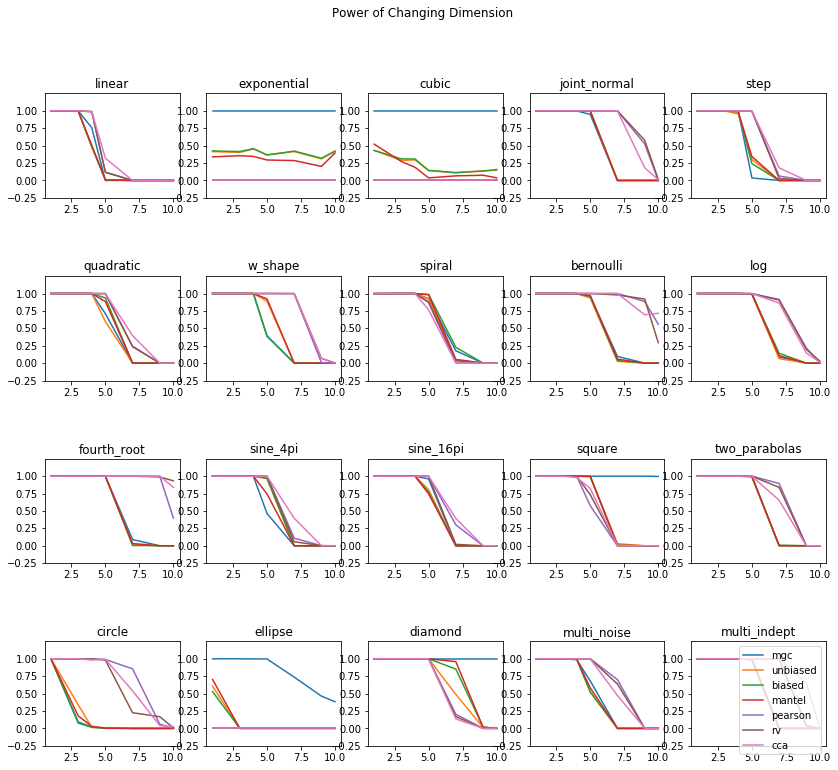

In [17]:
plot_all_curves()

In [18]:
def power_vs_dimension_parallel5(params_dict):
    dims = [1, 3, 4, 5, 7, 9, 10]
    estimated_power = np.zeros(len(dims))
    test = params_dict['independence_test']
    sim = params_dict['simulation_type']
    print(sim, test.get_name())
    
    for i in range(len(dims)):
        estimated_power[i] = power_given_data(test, sim, num_samples=100, num_dimensions=dims[i], translate=0.65)
    
    np.savetxt('{}_{}_dimension_matlab_new.csv'.format(sim, test.get_name()), estimated_power, delimiter=',')
    print('{} {} finished'.format(sim, test.get_name()))
    return (params_dict, estimated_power)

In [19]:
%%time
params_dict = fill_params_dict_list_dim()
print(type(params_dict))
pool = mp.Pool(mp.cpu_count()-1)
results = pool.map(power_vs_dimension_parallel5, params_dict)

<class 'list'>
13 biased
13 unbiased
13 mantel
13 mantel finished
13 pearson


Process ForkPoolWorker-13:
Process ForkPoolWorker-14:
Process ForkPoolWorker-15:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/anaconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/anaconda3/lib/python3.7/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/anaconda3/lib/python3.7/multiprocessing/poo

13 rv
13 cca


KeyboardInterrupt: 

13 rv finished
13 cca finished


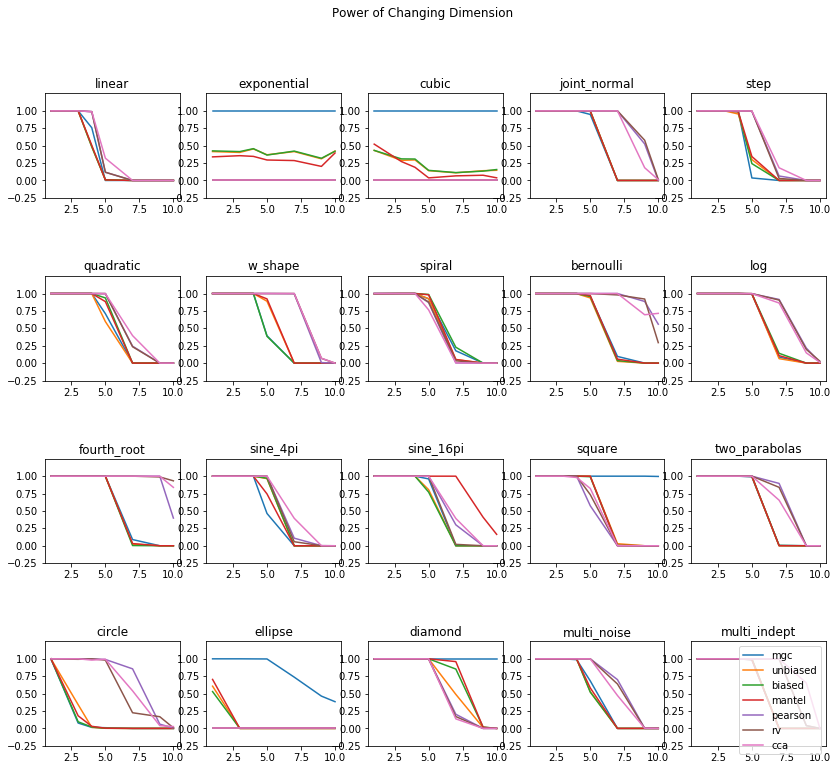

In [20]:
plot_all_curves()